<a href="https://colab.research.google.com/github/Lameeselbakr55/Capstone-NLP-Twitter-Disaster-Classifier/blob/master/Capstone_NLP_Twitter_Disaster_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Overview**
This project is centered on using Natural Language Processing (NLP) and machine learning to analyze social media data, specifically tweets, to distinguish between those that are related to natural disasters and those that are not.

**The objective** is to preprocess the text in tweets, apply NLP techniques for analysis, and then use machine learning models to classify each tweet.

**The aim** is to demonstrate how NLP and machine learning can be applied to real-world problems, such as enhancing disaster response mechanisms through the analysis of social media.

**The Dataset:**
https://www.kaggle.com/competitions/nlp-getting-started


**Project Goals**
* Apply NLP techniques to preprocess and analyze tweet text.
* Train various machine learning models to classify tweets as disaster-related or not.
* Evaluate the performance of these models to find the most accurate one.
* Gain hands-on experience in data analysis, modeling, and interpretation within the context of NLP and machine learning.

**Steps**
1. **Data Acquisition:**

 * Download the dataset from Kaggle and get familiar with its structure and content.

2. **Data Preprocessing:**
 * Clean the tweet text by removing noise such as special characters, URLs, and HTML tags.
 * Normalize the text by converting to lowercase, removing stopwords, and applying stemming or lemmatization.
 * Tokenize the text to convert sentences into individual words or tokens for further analysis.

3. **Feature Extraction:**
 * Employ TF-IDF or word embeddings to convert text data into a numerical format that can be processed by machine learning models.
 * Consider extracting additional features from the tweets, like tweet length or specific keywords.

4. **Model Training and Selection:**

 * Divide the dataset into training and testing sets for model evaluation.
 * Train different machine learning models like Naive Bayes, Logistic Regression, Support Vector Machines, and neural networks.
 * Use cross-validation to optimize model parameters and prevent overfitting.

5. **Model Evaluation:**
 * Use metrics like accuracy, precision, recall, and F1-score to evaluate the model's performance in classifying tweets.
 * Review the confusion matrix for each model to identify classification errors.

6. **Interpretation and Application:**
 * Choose the model that performs best based on evaluation metrics.
 *  Discuss how the model's predictions can be used in disaster response and emergency management.
 * Explore potential for real-time disaster monitoring and information dissemination through social media integration.

7. **Documentation and Presentation:**

 * Document the entire project process, methodologies, model choices, and evaluation outcomes. Prepare a summary of findings, model performance, and potential impact on disaster response strategies.

 #### **Read Data and show it**

In [ ]:
pip install scikit-optimize

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np

# Visualiztion Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Models development Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

# Models Evaluation Libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # Python data visualization library based on matplotlib
import plotly.express as px

import re  #  used to work with Regular Expressions
import nltk # Natural Language Toolkit
from nltk.stem import WordNetLemmatizer # Lemmatization with NLTK
from nltk.corpus import stopwords # to Removing stop words with NLTK
from wordcloud import WordCloud # to show which words are the most frequent among the given text.


In [ ]:
# read train , test and sample submission data
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')
sample_df=pd.read_csv('/content/sample_submission.csv')

### **`Data Exploration and visualization`**

In [ ]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
train_df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

**Tips about the training data:**

*  **Keyword:** : categorical column represents a particular keyword from the tweet (may be blank)
*  **location:** : categorical column represents the location the tweet was sent from (may be blank).
*  **text:** : categorical column represents the text of the tweet.
* **target:** : class label represents whether a tweet is about a real disaster (1) or not (0)
* **ID**: This seems to be an identifier for the entries and should not be used as a feature for modeling thus we will use it as index column.

In [ ]:
# set Id as index column
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)
train_df.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3263 entries, 0 to 10875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   3237 non-null   object
 1   location  2158 non-null   object
 2   text      3263 non-null   object
dtypes: object(3)
memory usage: 102.0+ KB


In [ ]:
# Summary statistics for numerical features
train_data_describe = train_df.describe(include=[object])
train_data_describe

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


**Check for null values**

In [ ]:
#check the null cells in train data
train_df.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
test_df.isnull().sum()

keyword       26
location    1105
text           0
dtype: int64

**From the above results:** there is null values in location and keyword columns in the train and test data. let's analyse them later

In [ ]:
train_df.duplicated().sum()

52

**From above results:**

we found that there is 52 duplicated values in train data thus let's drop them.

In [ ]:
# to drop dublicates.
train_df = train_df.drop_duplicates(subset=['text'], keep='first')

In [ ]:
train_df.duplicated().sum()

0

**Analysis of the Location column**

In [ ]:
train_df['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [ ]:
# count each unique value in location column, display all uniques

location_counts = train_df['location'].value_counts()
print(location_counts)


location
USA                          104
New York                      71
United States                 50
London                        45
Canada                        29
                            ... 
milky way                      1
GREENSBORO,NORTH CAROLINA      1
England.                       1
Sheffield Township, Ohio       1
Anaheim                        1
Name: count, Length: 3327, dtype: int64


In [ ]:
# count how many values with unique value count =1 in location column

unique_count_1 = len(location_counts[location_counts == 1])
print(f"Number of values with unique count 1: {unique_count_1}")


Number of values with unique count 1: 2818


**from the above analysis:** we found that the loation column have 2500 null value and 2821 record unique with count = 1 thus this column will be useless let's drop it

In [ ]:
#  drop the location column

train_df.drop('location', axis=1, inplace=True)
test_df.drop('location', axis=1, inplace=True)


<ipython-input-18-b4c319e41be0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('location', axis=1, inplace=True)


**Analysis of the Keyword column**

In [ ]:
keyword_counts = train_df['keyword'].value_counts()
print(keyword_counts)

keyword
fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64


**Note from above** There is some unique word that may help later in analysis. and because there is only 61 record null out of 7613 record whic is very small value thus let's drop null values

In [ ]:
# drop null values

train_df = train_df.dropna()

In [ ]:
train_df

,keyword,text,target
id,,,
48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,Crying out for more! Set me ablaze,0
53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...
10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0
10831,wrecked,Three days off from work and they've pretty mu...,0
10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0


**Data Visualization**

In [ ]:
train_df['text'][50]

'#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi'

**Labels count distribution**

In [ ]:
label_counts = train_df['target'].value_counts()
label_counts

target
0    4286
1    3161
Name: count, dtype: int64

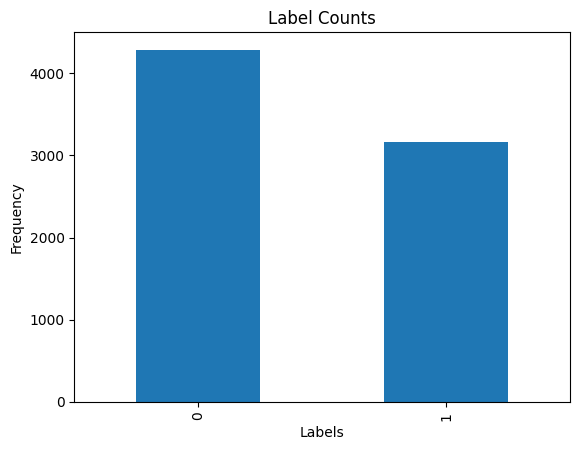

In [ ]:
label_counts.plot(kind='bar')
plt.title('Label Counts')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

**Preprocessing Trial 1** : Stemming

**Steps:**

* remove any html tags (< /br> often found) pr links
- Keep only ASCII + European Chars and whitespace, no digits
- remove single letter chars
- convert all whitespaces (tabs etc.) to single wspace
    
if not for embedding (but e.g. tdf-idf):
* all lowercase
* remove stopwords, punctuation and stemm

**Models used with this trial**
* xgboost with word level vectorizer and random search for hyperparameter tuning
* Xgboost with count vectorizer and Random search for hyperparameter tuning.
* Logistic regression with word level vectorizer and grid search as hyperparameter tuning method.
* Random forest with word word vectorizer


In [ ]:
import re # used to work with Regular Expressions.
import nltk
from nltk.stem.snowball import SnowballStemmer # english language support
from nltk.corpus import stopwords # A stop word is a commonly used word (such as “the”, “a”, “an”)
from nltk.tokenize import word_tokenize # that splits a given sentence into words using the NLTK library.

In [ ]:
# Downloading punkt package
nltk.download('punkt')
# Downloading stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmer = SnowballStemmer('english')                # for english language.
stop_words = set(stopwords.words("english"))

def clean_text(text, for_embedding=False):

    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-z ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-z]\b", re.IGNORECASE)
    RE_LINKS = re.compile(r"https?:\/\/t.co\/[A-Za-z0-9]+", re.IGNORECASE)
    RE_DIG = re.compile(r"\d+", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-z,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-z,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_LINKS, " ", text)
    text = re.sub(RE_DIG, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    # divide rows into sentences(tokens) to be easier to undrstand
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [ ]:
# applying 'clean_text' fun. for the 'text' column and return the cleaned text in a new column.
train_df['clean_text'] = train_df['text'].apply(clean_text)

In [ ]:
train_df

,keyword,text,target,clean_text
id,,,,
48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesal market ablaz http co lhyxeohi
49,ablaze,We always try to bring the heavy. #metal #RT h...,0,alway tri bring heavi metal rt http co yao xngw
50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaz break news nigeria flag set ablaz a...
52,ablaze,Crying out for more! Set me ablaze,0,cri set ablaz
53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaz http co qq...
...,...,...,...,...
10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0,jt ruff cameronhack wreck
10831,wrecked,Three days off from work and they've pretty mu...,0,three day work pretti much wreck hahaha shouto...
10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0,fx forex trade cramer iger word wreck disney s...


In [ ]:
train_df['text'][50]

'#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi'

In [ ]:
train_df['clean_text'][50]

'africanbaz break news nigeria flag set ablaz aba http co nndbgwyei'

In [ ]:
# the same thing for testing data
test_df['clean_text'] = test_df['text'].apply(clean_text)

In [ ]:
# to know how many dublicates
train_df.describe(include=[object])

,keyword,text,clean_text
count,7447,7447,7447
unique,221,7447,7409
top,fatalities,Cramer: Iger's 3 words that wrecked Disney's s...,black eye space battl occur star involv fleet ...
freq,45,1,9


After we had cleaned the data we had found there are some duplicates .
so, we need to handle it

In [ ]:
train_df.duplicated(subset=['clean_text']).sum()

38

In [ ]:
# to drop dublicates.
train_df = train_df.drop_duplicates(subset=['clean_text'], keep='first')

**Data preparation for models**
1. Divide data into x,y
2. split data into train, test and validation

In [ ]:
# divide the data into x and y.
x = train_df['clean_text']
y = train_df['target']

In [ ]:
# Split the dataset into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

**Trial 1:**
Xgboost with word-level vectorizer and Random search for hyperparameter tuning.

In [ ]:
# step_1 : applying TfidfVectorizer with word-level vactorizer.
# step_2 : calling my classifier
full_pipline = Pipeline(
    steps=[
        ("vectorizer", TfidfVectorizer(analyzer='word')),
        ('my_classifier',
           XGBClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('my_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# XGB hyperparameters
params = {
    "vectorizer__ngram_range": [(1, 2), (1, 3)],
    "vectorizer__max_df": np.arange(0.3, 0.8),
    "vectorizer__min_df": np.arange(5, 100),
    'my_classifier__n_estimators': [20, 30, 40],
    'my_classifier__max_depth':[10, 15, 25]
}

In [ ]:
# Tune RandomizedSearchCV
RS_xgboost_model = RandomizedSearchCV(full_pipline, params,  n_jobs=-1, scoring="roc_auc", n_iter=5,verbose=1)

# to train on the all data for summition on kaggle
RS_xgboost_model.fit(X_train, y_train)

# predict best score and hyperparameter
print('best score {}'.format(RS_xgboost_model.best_score_))
print('best hyperparameter {}'.format(RS_xgboost_model.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best score 0.8151974976734568
best hyperparameter {'vectorizer__ngram_range': (1, 3), 'vectorizer__min_df': 16, 'vectorizer__max_df': 0.3, 'my_classifier__n_estimators': 30, 'my_classifier__max_depth': 15}


In [ ]:
# Evaluate the model on the validation data
accuracy = RS_xgboost_model.score(X_val, y_val)
print('Accuracy validation data:', accuracy)

# Evaluate the model on the testing data
accuracy = RS_xgboost_model.score(X_test, y_test)
print('Accuracy testing data:', accuracy)

Accuracy validation data: 0.8021031912817664
Accuracy testing data: 0.8304164812342383


In [ ]:
# Display the classification report
test_pred= RS_xgboost_model.predict(X_test)
print(f"Classification Report for xgboost model:")
print("="*40)
print()
print(classification_report(y_test,test_pred ))
print()

Classification Report for xgboost model:

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       840
           1       0.83      0.62      0.71       642

    accuracy                           0.78      1482
   macro avg       0.79      0.76      0.77      1482
weighted avg       0.79      0.78      0.77      1482




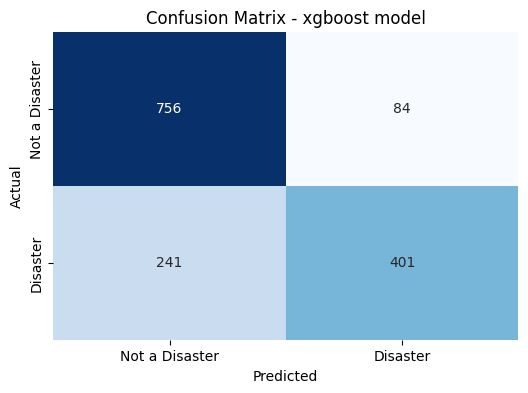

In [ ]:
cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'],
            yticklabels=['Not a Disaster', 'Disaster'])
plt.title(f'Confusion Matrix - xgboost model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate predictions
ypred1= RS_xgboost_model.predict(test_df['clean_text'])
ypred1

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
# submission the file to try our model on test data on kaggle
id = test_df.index
label_pred = ypred1
submission_1 = pd.DataFrame({'ID': id, 'Target': label_pred})
submission_1.to_csv('submission_1.csv', index=False)
print("Submission_1 was saved successfully")
submission_1

Submission_1 was saved successfully


,ID,Target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,0
3261,10874,1


**Trail 2:**
Xgboost with count vectorizer and Random search for hyperparameter tuning.

In [ ]:
# step_1 : applying TfidfVectorizer with character-level vactorizer.
# step_2 : calling my classifier
full_pipline = Pipeline(
    steps=[
        ("vectorizer", CountVectorizer()),
        ('my_classifier',
           XGBClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('my_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# XGB hyperparameters
params = {
   # "vectorizer__ngram_range": [(2, 6)],
    "vectorizer__max_df": np.arange(0.3, 0.5, 0.8),
    "vectorizer__min_df": np.arange(5, 100),
    'my_classifier__n_estimators': [50, 100, 150],
    'my_classifier__max_depth':[20, 25, 30]
}

In [ ]:
# Tune RandomizedSearchCV
RS_xgboost_model_2 = RandomizedSearchCV(full_pipline, params, cv=None,)

# to train on the all data for summition on kaggle
RS_xgboost_model_2.fit(X_train, y_train)

# predict best score and hyperparameter
print('best score {}'.format(RS_xgboost_model_2.best_score_))
print('best hyperparameter {}'.format(RS_xgboost_model_2.best_params_))

best score 0.7277840269966255
best hyperparameter {'vectorizer__min_df': 28, 'vectorizer__max_df': 0.3, 'my_classifier__n_estimators': 150, 'my_classifier__max_depth': 25}


In [ ]:
# Evaluate the model on the validation data
accuracy = RS_xgboost_model_2.score(X_val, y_val)
print('Accuracy validation data:', accuracy)

# Evaluate the model on the testing data
accuracy = RS_xgboost_model_2.score(X_test, y_test)
print('Accuracy testing data:', accuracy)

Accuracy validation data: 0.7483130904183536
Accuracy testing data: 0.7550607287449392


In [ ]:
# Display the classification report
test_pred2= RS_xgboost_model_2.predict(X_test)
print(f"Classification Report for xgboost model")
print("="*40)
print()
print(classification_report(y_test,test_pred2 ))
print()

Classification Report for xgboost model

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       840
           1       0.81      0.47      0.59       642

    accuracy                           0.72      1482
   macro avg       0.75      0.69      0.69      1482
weighted avg       0.75      0.72      0.70      1482




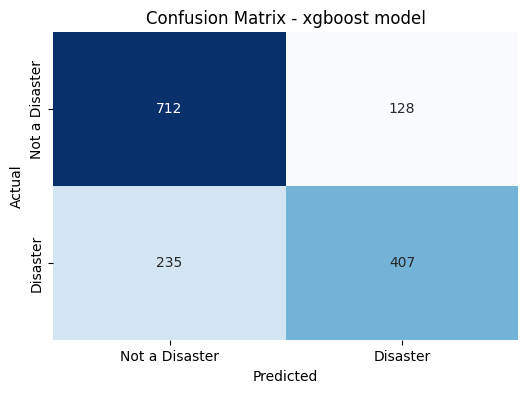

In [ ]:
cm = confusion_matrix(y_test, test_pred2)

# Plot confusion matrix with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'],
            yticklabels=['Not a Disaster', 'Disaster'])
plt.title(f'Confusion Matrix - xgboost model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate predicted probability
ypred2= RS_xgboost_model_2.predict(test_df['clean_text'])
ypred2

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# submission the file to try our model on test data on kaggle
id = test_df.index
label_pred = ypred2
submission_2 = pd.DataFrame({'ID': id, 'Target': label_pred})
submission_2.to_csv('submission_2.csv', index=False)
print("Submission_2 was saved successfully")
submission_2

Submission_2 was saved successfully


,ID,Target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


**Observations from results above**
word level vectorizer have higher accarcy than char level vectorizer

**Trial 3:** Logistic regression with word level vectorizer and grid search as hyperparameter tuning method.

In [ ]:
# step_1 : applying TfidfVectorizer with character-level vactorizer.
# step_2 : calling my classifier
full_pipline = Pipeline(
    steps=[
        ("vectorizer", TfidfVectorizer(analyzer='word')),
        ('my_classifier',
           LogisticRegression(max_iter = 600, random_state=42),
        )
    ]
)
full_pipline

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('my_classifier',
                 LogisticRegression(max_iter=600, random_state=42))])

In [ ]:
#Define Parameters
# LogisticRegression hyperparameters
params = {
    "my_classifier__solver": [ 'lbfgs', 'liblinear', 'saga'],
    "my_classifier__C": np.arange(0.1, 1, 0.1),
    "my_classifier__penalty":['l1', 'l2', 'none']
}

In [ ]:
GS_logistic_reg = GridSearchCV(full_pipline, params, cv=5, verbose=1, n_jobs=2,scoring='roc_auc')

GS_logistic_reg.fit(X_train, y_train)
print('best score {}'.format(GS_logistic_reg.best_score_))
print('best score {}'.format(GS_logistic_reg.best_params_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
best score 0.8417423224071967
best score {'my_classifier__C': 0.9, 'my_classifier__penalty': 'l2', 'my_classifier__solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


In [ ]:
# Evaluate the model on the validation data
accuracy = GS_logistic_reg.score(X_val, y_val)
print('Accuracy validation data:', accuracy)

# Evaluate the model on the testing data
accuracy = GS_logistic_reg.score(X_test, y_test)
print('Accuracy testing data:', accuracy)

Accuracy validation data: 0.8331519536468576
Accuracy testing data: 0.8683068164960688


In [ ]:
# Display the classification report
test_pred3= GS_logistic_reg.predict(X_test)
print(f"Classification Report for logistc regression model:")
print("="*50)
print()
print(classification_report(y_test,test_pred3 ))
print()


Classification Report for logistc regression model:

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       840
           1       0.79      0.70      0.74       642

    accuracy                           0.79      1482
   macro avg       0.79      0.78      0.78      1482
weighted avg       0.79      0.79      0.79      1482




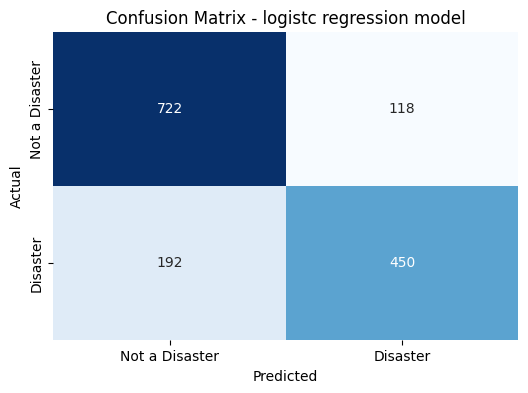

In [ ]:
cm = confusion_matrix(y_test, test_pred3)

# Plot confusion matrix with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'],
            yticklabels=['Not a Disaster', 'Disaster'])
plt.title(f'Confusion Matrix - logistc regression model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate predicted probability
ypred3= GS_logistic_reg.predict(test_df['clean_text'])
ypred3

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# submission the file to try our model on test data on kaggle
id = test_df.index
label_pred = ypred3
submission_3 = pd.DataFrame({'ID': id, 'Target': label_pred})
submission_3.to_csv('submission_3.csv', index=False)
print("Submission_3 was saved successfully")
submission_3

Submission_3 was saved successfully


,ID,Target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


**Trial 4:** Random Forest with word level vectorizer.

In [ ]:
# Define a pipeline with a vectorizer and a random forest classifier with tunable hyperparameters
full_pipeline = Pipeline([
  ('vectorizer', TfidfVectorizer(analyzer='word')),
  ('my_classifier', RandomForestClassifier())
])
full_pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('my_classifier', RandomForestClassifier())])

In [ ]:
# Fit the model
rf_model = full_pipeline.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

In [ ]:
# Evaluate the model on the validation data
y_val_pred = rf_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print('Accuracy on validation data:', accuracy_val)

# Evaluate the model on the testing data
y_test_pred = rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy on testing data:', accuracy_test)

Accuracy on validation data: 0.7699055330634278
Accuracy on testing data: 0.7887989203778677


In [ ]:
# Display the classification report
test_pred4= rf_model.predict(X_test)
print(f"Classification Report for Random Forest model:")
print("="*40)
print()
print(classification_report(y_test,test_pred4 ))
print()

Classification Report for Random Forest model:

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       840
           1       0.85      0.62      0.72       642

    accuracy                           0.79      1482
   macro avg       0.81      0.77      0.77      1482
weighted avg       0.80      0.79      0.78      1482




In [ ]:
# calculate predicted probability
ypred4= rf_model.predict(test_df['clean_text'])
ypred4

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# submission the file to try our model on test data on kaggle
id = test_df.index
label_pred = ypred4
submission_4 = pd.DataFrame({'ID': id, 'Target': label_pred})
submission_4.to_csv('submission_4.csv', index=False)
print("Submission_4 was saved successfully")
submission_4

Submission_4 was saved successfully


,ID,Target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


**Preprocessing Trial 2** : lemmatizer

**Steps:**

* remove any html tags (< /br> often found)
- Keep only ASCII + European Chars and whitespace, no digits
- remove single letter chars
- convert all whitespaces (tabs etc.) to single wspace
    
if not for embedding (but e.g. tdf-idf):
* all lowercase
* remove stopwords, punctuation and stemm

**Models used with this trial**
* xgboost with word level vectorizer and random search for hyperparameter tuning
* SVM with word level vectorizer.




**lemmatizer code**

In [ ]:
from nltk.stem import  WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

#helper function for preocessing
def clean_text_lemet(text, for_embedding=False):
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            lemmatizer.lemmatize(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# applying 'clean_text' fun. for the 'text' column and return the cleaned text in a new column.
train_df['clean_text_2'] = train_df['text'].apply(clean_text_lemet)

<ipython-input-69-a2e3714967e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['clean_text_2'] = train_df['text'].apply(clean_text_lemet)


In [ ]:
train_df

,keyword,text,target,clean_text,clean_text_2
id,,,,,
48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesal market ablaz http co lhyxeohi,bbcmtd wholesale market ablaze http co lhyxeohy
49,ablaze,We always try to bring the heavy. #metal #RT h...,0,alway tri bring heavi metal rt http co yao xngw,always try bring heavy metal rt http co yao xngw
50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaz break news nigeria flag set ablaz a...,africanbaze breaking news nigeria flag set abl...
52,ablaze,Crying out for more! Set me ablaze,0,cri set ablaz,cry set ablaze
53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaz http co qq...,plus side look sky last night ablaze http co q...
...,...,...,...,...,...
10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0,jt ruff cameronhack wreck,jt ruff cameronhacker wrecked
10831,wrecked,Three days off from work and they've pretty mu...,0,three day work pretti much wreck hahaha shouto...,three day work pretty much wrecked hahaha shou...
10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0,fx forex trade cramer iger word wreck disney s...,fx forex trading cramer iger word wrecked disn...


In [ ]:
# to know how many dublicates
train_df.describe(include=[object])

,keyword,text,clean_text,clean_text_2
count,7409,7409,7409,7409
unique,221,7409,7409,7409
top,fatalities,Cramer: Iger's 3 words that wrecked Disney's s...,cramer iger word wreck disney stock cnbc http ...,cramer iger word wrecked disney stock cnbc htt...
freq,45,1,1,1


In [ ]:
# the same thing for testing data
test_df['clean_text_2'] = test_df['text'].apply(clean_text_lemet)

**Data preparation for models**
1. Divide data into x,y
2. split data into train, test and validation

In [ ]:
# divide the data into x and y.
x = train_df['clean_text_2']
y = train_df['target']

In [ ]:
# Split the dataset into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

**Trial 5:** xgboost with word level vectorizer and random forest for hyperparameter tuning.

In [ ]:
# step_1 : applying TfidfVectorizer with word-level vactorizer.
# step_2 : calling my classifier
full_pipline = Pipeline(
    steps=[
        ("vectorizer", TfidfVectorizer(analyzer='word')),
        ('my_classifier',
           XGBClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('my_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# XGB hyperparameters
params = {
    "vectorizer__ngram_range": [(1, 2), (1, 3)],
    "vectorizer__max_df": np.arange(0.3, 0.8),
    "vectorizer__min_df": np.arange(5, 100),
    'my_classifier__n_estimators': [20, 30, 40, 90],
    'my_classifier__max_depth':[10, 15, 25 ,35]
}

In [ ]:
# Tune RandomizedSearchCV
RS_xgboost_model = RandomizedSearchCV(full_pipline, params,  n_jobs=-1, scoring="roc_auc", n_iter=7,verbose=1)

# to train on the all data for summition on kaggle
RS_xgboost_model.fit(X_train, y_train)

# predict best score and hyperparameter
print('best score {}'.format(RS_xgboost_model.best_score_))
print('best hyperparameter {}'.format(RS_xgboost_model.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
best score 0.759366663219936
best hyperparameter {'vectorizer__ngram_range': (1, 3), 'vectorizer__min_df': 23, 'vectorizer__max_df': 0.3, 'my_classifier__n_estimators': 20, 'my_classifier__max_depth': 10}


In [ ]:
# Evaluate the model on the validation data
accuracy = RS_xgboost_model.score(X_val, y_val)
print('Accuracy validation data:', accuracy)

# Evaluate the model on the testing data
accuracy = RS_xgboost_model.score(X_test, y_test)
print('Accuracy testing data:', accuracy)

Accuracy validation data: 0.7885062819916239
Accuracy testing data: 0.7874666221628839


In [ ]:
# Display the classification report
test_pred5= RS_xgboost_model.predict(X_test)
print(f"Classification Report for xgboost model:")
print("="*40)
print()
print(classification_report(y_test,test_pred5 ))
print()

Classification Report for xgboost model:

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       840
           1       0.81      0.49      0.61       642

    accuracy                           0.73      1482
   macro avg       0.75      0.70      0.70      1482
weighted avg       0.75      0.73      0.71      1482




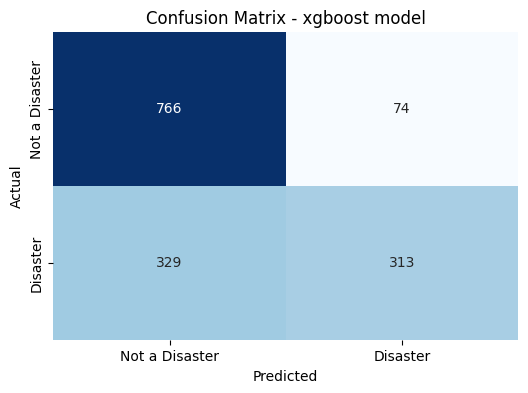

In [ ]:
cm = confusion_matrix(y_test, test_pred5)

# Plot confusion matrix with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'],
            yticklabels=['Not a Disaster', 'Disaster'])
plt.title(f'Confusion Matrix - xgboost model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate predicted probability
ypred5= RS_xgboost_model.predict(test_df['clean_text_2'])
ypred5

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
# submission the file to try our model on test data on kaggle
id = test_df.index
label_pred = ypred5
submission_5 = pd.DataFrame({'ID': id, 'Target': label_pred})
submission_5.to_csv('submission_5.csv', index=False)
print("Submission_5 was saved successfully")
submission_5

Submission_5 was saved successfully


,ID,Target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,0


**Trial 6:** SVM with word level vectorizer.

In [ ]:
from sklearn.svm import SVC

In [ ]:
# step_1 : applying TfidfVectorizer with word-level vactorizer.
# step_2 : calling my classifier
full_pipeline = Pipeline(
    steps=[
        ("vectorizer", TfidfVectorizer(analyzer='word')),
        ('my_classifier', SVC()),  # Make sure this is SVC, not RandomForestClassifier
    ]
)
full_pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('my_classifier', SVC())])

In [ ]:
# SVM hyperparameters to tune
params = {
    "vectorizer__ngram_range": [(1, 2), (1, 3)],
    "vectorizer__max_df": np.arange(0.3, 0.8, 0.1),
    "vectorizer__min_df": np.arange(5, 100, 10),
    'my_classifier__C': [0.1, 1, 10, 100],
    'my_classifier__gamma': ['scale', 'auto'],
    'my_classifier__kernel': ['linear', 'rbf', 'poly']
}

In [ ]:
# Tune RandomizedSearchCV
RS_svm_model = RandomizedSearchCV(full_pipeline, params, n_jobs=-1, scoring="roc_auc", n_iter=5, verbose=1)

# Train on the all data for submission on Kaggle
RS_svm_model.fit(X_train, y_train)  # Assuming X_train and y_train are defined

# Predict best score and hyperparameters
print('Best score: {}'.format(RS_svm_model.best_score_))
print('Best hyperparameters: {}'.format(RS_svm_model.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best score: 0.8328611312170405
Best hyperparameters: {'vectorizer__ngram_range': (1, 2), 'vectorizer__min_df': 5, 'vectorizer__max_df': 0.6000000000000001, 'my_classifier__kernel': 'rbf', 'my_classifier__gamma': 'auto', 'my_classifier__C': 0.1}


In [ ]:
# Evaluate the model on the validation data
accuracy = RS_svm_model.score(X_val, y_val)
print('Accuracy validation data:', accuracy)

# Evaluate the model on the testing data
accuracy = RS_svm_model.score(X_test, y_test)
print('Accuracy testing data:', accuracy)

Accuracy validation data: 0.8329136582656599
Accuracy testing data: 0.8517365746921821


In [ ]:
# Display the classification report
test_pred6= RS_svm_model.predict(X_test)
print(f"Classification Report for SVM model:")
print("="*40)
print()
print(classification_report(y_test,test_pred ))
print()

Classification Report for SVM model:

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       840
           1       0.83      0.62      0.71       642

    accuracy                           0.78      1482
   macro avg       0.79      0.76      0.77      1482
weighted avg       0.79      0.78      0.77      1482




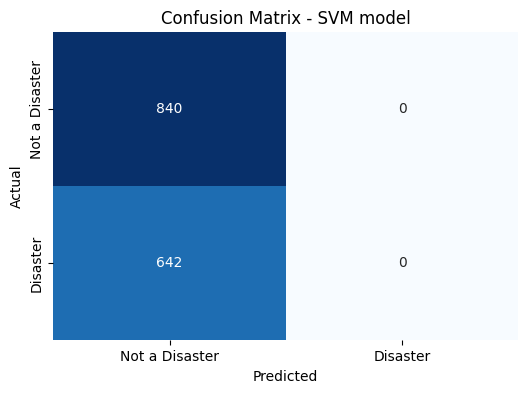

In [ ]:
cm = confusion_matrix(y_test, test_pred6)

# Plot confusion matrix with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not a Disaster', 'Disaster'],
            yticklabels=['Not a Disaster', 'Disaster'])
plt.title(f'Confusion Matrix - SVM model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate predictions
ypred6= RS_svm_model.predict(test_df['clean_text_2'])
ypred6

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# submission the file to try our model on test data on kaggle
id = test_df.index
label_pred = ypred6
submission_6 = pd.DataFrame({'ID': id, 'Target': label_pred})
submission_6.to_csv('submission_6.csv', index=False)
print("Submission_6 was saved successfully")
submission_6

Submission_6 was saved successfully


,ID,Target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


**What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?**

Count Vectorizer and TF-IDF Vectorizer are both techniques used in natural language processing (NLP) to convert text data into numerical vectors for machine learning algorithms, but they differ in how they represent the text data:

* **Count Vectorizer:**
 * Count Vectorizer represents text documents as sparse matrices where each row corresponds to a document and each column corresponds to a unique word in the corpus.
 * The values in the matrix represent the frequency of each word in the corresponding document.
 * It does not consider the relative importance of words across documents.

* **TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency):**
 * TF-IDF Vectorizer also represents text documents as sparse matrices, but it assigns weights to words based on their frequency in the document and their rarity across all documents in the corpus.
 * Words that appear frequently within a document but rarely across all documents receive higher weights.
 * TF-IDF accounts for the importance of words in distinguishing between documents.

 **The selection of n-grams** depends on the specific task and the characteristics of the data. In general, it is recommended to start with unigrams (single words) and bigrams (pairs of adjacent words) and then experiment with higher-order n-grams if necessary. It is also important to consider the frequency of the n-grams in the data and to remove any n-grams that are too rare or too common. Additionally, domain-specific knowledge can be used to select relevant n-grams for the task at hand.

